In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectorizer -> convert text data into numerical features using word counts
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("synthetic_text_data.csv")

In [5]:
x = data["text"]
y = data["label"]
data.head()


,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


In [6]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [7]:
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [8]:
model = MultinomialNB()
model.fit(x_train_vectorized , y_train )

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [9]:
y_pred = model.predict(x_test_vectorized)


In [10]:
data.shape

(85, 2)

In [11]:
accuracy_score(y_test , y_pred)

0.8823529411764706

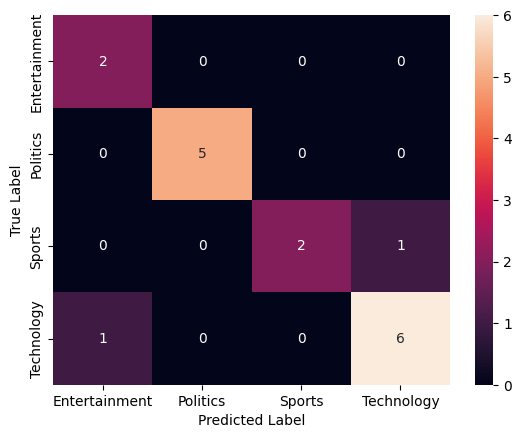

In [12]:
conf_matrix = confusion_matrix(y_test , y_pred)
class_labels = np.unique(y_test)

sns.heatmap(conf_matrix , annot = True , xticklabels=class_labels , yticklabels=class_labels )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# prediction on unseen data

user_input = ("artificial intelligence are popular")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.") 

The input text belongs to the 'Technology' category.
